# Widefield tutorial

This tutorial demonstraces how to access the *Widefield dataset* using `pynwb`. 

This dataset contains the Widefield imaging from multiple cortical visual areas and behavior measurements from the ViRMEN system.

Contents:

- [Reading an NWB file](#read-nwb)
- [Access subject and task metadata](#access-subject)
- [Access Imaging](#access-imaging)
- [Access Behavior](#access-behavior)
- [View NWB files](#view-nwb)

![Alt text](data_types.png)

# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.


In [7]:
from pynwb import NWBHDF5IO

# The file path to a .nwb file
nwbfile_path = "/Users/weian/data/210944/sub-DrChicken/sub-DrChicken_ses-20230419-20hz_behavior+ophys.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

nwbfile

root pynwb.file.NWBFile at 0x5366782288
Fields:
  acquisition: {
    OnePhotonSeriesBlue <class 'pynwb.ophys.OnePhotonSeries'>,
    OnePhotonSeriesViolet <class 'pynwb.ophys.OnePhotonSeries'>
  }
  devices: {
    Microscope <class 'pynwb.device.Device'>
  }
  experimenter: ['Luo, Jiaqi']
  file_create_date: [datetime.datetime(2023, 11, 30, 15, 52, 45, 875965, tzinfo=tzoffset(None, 3600))]
  identifier: 35b7de81-5636-47d8-8bb2-6ce5db2af37e
  imaging_planes: {
    ImagingPlaneBlue <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneViolet <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Northwestern University
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Pinto
  lab_meta_data: {
    LabMetaData <class 'abc.LabMetaDataExtension'>
  }
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  protocol: IS00016447
  session_description: A rich text description of the experiment. Can also just be the abstract of the publication.
  session_id: 20230419-20hz
  session_start_time: 2023-04-19 10:57:31.591000-07:00
  subject: subject pynwb.file.Subject at 0x5573526416
Fields:
  age__reference: birth
  date_of_birth: 2022-12-10 00:00:00-08:00
  genotype: ChAT-Ai96
  sex: M
  species: Mus musculus
  subject_id: DrChicken

  timestamps_reference_time: 2023-04-19 10:57:31.591000-07:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

# Access subject and task related metadata <a name="access-subject"></a>

## Access subject metadata

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [9]:
nwbfile.subject

subject pynwb.file.Subject at 0x5573526416
Fields:
  age__reference: birth
  date_of_birth: 2022-12-10 00:00:00-08:00
  genotype: ChAT-Ai96
  sex: M
  species: Mus musculus
  subject_id: DrChicken

## Access ViRMEN experimental metadata (mazes table, stimulus protocol parameters)

This section demonstrates how to access the task related metadata in an NWB file.

The ViRMEN experimental metadata is stored in a [LabMetaData](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.LabMetaData) extension ([ndx-pinto-metadata](https://github.com/catalystneuro/ndx-pinto-metadata)). 

The LabMetaData](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.LabMetaData) object can be accessed as `nwbfile.lab_meta_data["LabMetaData"]`.

The parameters for the mazes is added to the `mazes` table within `nwbfile.lab_meta_data["LabMetaData"]` which can be accessed as `nwbfile.lab_meta_data["LabMetaData"].mazes`. 

Data arrays are read passively from the file. Accessing the data attribute of the `mazes` object does not read the data values, but presents an HDF5 object that can be indexed to read data. You can use the [:] operator to read the entire data array into memory as `nwbfile.lab_meta_data["LabMetaData"].mazes[:]`.

In [17]:
nwbfile.lab_meta_data["LabMetaData"]

LabMetaData abc.LabMetaDataExtension at 0x5354296080
Fields:
  advance: 0
  experiment_code: TowersTaskSwitchEasy
  experiment_name: TowersTaskSwitchEasy
  mazes: mazes <class 'abc.MazeExtension'>
  num_iterations: 407877
  num_trials: 336
  rig: VR_Widefield
  session_duration: 3754.9149446
  session_index: 41
  stimulus_protocol: stimulus_protocol <class 'hdmf.common.table.DynamicTable'>
  surface_quality: 70.18
  total_reward: 1.6560000000000012

In [22]:
nwbfile.lab_meta_data["LabMetaData"].mazes[:]

,lStart,lCue,lMemory,lContext,turnHint,hideHintUntil,cueDuration,cueVisibleAt,cueProbability,cueDensityPerM,...,numSessions,numTrials,numTrialsPerMin,performance,warmupBias,warmupMaxNTrials,warmupMaze,warmupMotor,warmupNTrials,warmupPerform
id,,,,,,,,,,,,,,,,,,,,,
0,5,45,10,10,1,-15,NaN,10,inf,3,...,0,10,2,0.00,[nan],[nan],[nan],[nan],[nan],[nan]
1,30,100,20,20,1,-50,NaN,10,inf,3,...,0,40,2,0.00,[nan],[nan],[nan],[nan],[nan],[nan]
2,30,190,20,30,1,-60,NaN,10,inf,3,...,0,80,2,0.60,[nan],[nan],[nan],[nan],[nan],[nan]
3,30,230,20,50,1,0,NaN,10,inf,4,...,2,80,2,0.90,[nan],[nan],[nan],[nan],[nan],[nan]
4,30,230,20,50,0,0,NaN,10,inf,4,...,1,80,2,0.80,[0.1],[60.0],[4.0],[0.0],[30.0],[0.8]
5,30,190,60,50,0,0,NaN,10,inf,4,...,1,80,2,0.80,[0.1],[60.0],[4.0],[0.0],[30.0],[0.8]
6,30,150,100,50,0,0,NaN,10,inf,4,...,1,80,2,0.80,[0.1],[60.0],[4.0],[0.0],[30.0],[0.8]
7,30,150,100,50,0,0,NaN,10,2.5,4,...,1,80,2,0.75,"[0.1, 0.1]","[20.0, 30.0]","[4.0, 7.0]","[0.75, 0.75]","[10.0, 15.0]","[0.85, 0.8]"
8,30,150,100,50,0,0,NaN,10,1.6,4,...,1,80,2,0.70,[0.1],[20.0],[4.0],[0.75],[10.0],[0.85]


In [23]:
nwbfile.lab_meta_data["LabMetaData"].stimulus_protocol[:]

,numMazesInProtocol,trialDraw,stimDraw,cueMinSeparation,totalRepeatProbability,numRepeatTrials,visualcolor,memorycolor,princetonImplementation,stimulus_code
id,,,,,,,,,,
0,11,EradeCapped,LeftOneOnly,12,0.05,2,"[0, 0, 1]","[1, 1, 0]",1,TowersTaskSwitchStimulusTrain


## Access trials

Behavior trials are stored in `nwbfile.trials`. The `start_time` denotes the start time of each trial in seconds relative to the global session start time (using the "StartOfTrial" column from ViRMEN `.mat` file).
The `stop_time` denotes the end time of each trial in seconds relative to the global session start time
(using the "EndOfTrial" column from the ViRMEN `.mat` file).

`nwbfile.trials` can be converted to a pandas DataFrame for convenient analysis using `nwbfile.trials.to_dataframe`.


In [46]:
trials = nwbfile.trials.to_dataframe()

trials[:10]

,start_time,stop_time,InterTrial,SetupTrial,InitializeTrial,WithinTrial,WithinContext,WithinCue,WithinDelay,WithinArms,...,nDistract,posSalient,posDistract,startIdx,mazeID,mainMazeID,distanceTraveled,excessTravel,rewardFactor,reward
id,,,,,,,,,,,,,,,,,,,,,
0,0.909966,7.271522,8.583685,0.000000,0.000000,6.450284,1.358135,2.166536,4.641668,6.458506,...,0,[nan],[nan],1.0,13.0,11.0,350.353220,-0.166818,1.5,1.0
1,10.814495,18.314169,19.626610,102.490120,10.775707,16.609617,11.667454,12.484078,15.042678,16.617932,...,0,[nan],[nan],1102.0,13.0,11.0,355.420683,-0.154767,1.5,1.0
2,21.743707,27.903475,29.219161,111.852504,21.710063,26.685581,22.360060,23.101868,25.243717,26.693910,...,0,[nan],[nan],2362.0,13.0,11.0,352.031584,-0.162826,1.5,1.0
3,31.322219,37.632828,38.953310,120.488884,31.302666,36.094812,31.752710,32.394347,34.602882,36.103057,...,0,[nan],[nan],3461.0,13.0,11.0,357.422186,-0.150007,1.5,1.0
4,41.075315,46.084046,47.404256,136.962611,41.036849,45.545664,41.461924,42.020375,43.937248,45.554195,...,0,[nan],[nan],4580.0,13.0,11.0,345.586712,-0.178153,1.5,1.0
5,49.547212,54.684280,56.013430,155.345215,49.521185,54.138277,49.929496,50.521363,52.563017,54.146616,...,0,[nan],[nan],5541.0,13.0,11.0,345.630288,-0.178049,1.5,1.0
6,58.108839,63.149754,64.472509,164.816137,58.096967,62.872325,58.472001,59.071988,61.230530,62.880761,...,0,[nan],[nan],6520.0,13.0,11.0,346.368546,-0.176294,1.5,1.0
7,66.567484,72.458560,73.773566,173.978186,66.556058,71.589923,67.056115,67.747934,69.964713,71.598314,...,0,[nan],[nan],7487.0,13.0,11.0,351.158302,-0.164903,1.5,1.0
8,75.868855,81.534504,82.849307,183.373662,75.857036,81.224259,76.290304,76.973813,79.423986,81.232587,...,0,[nan],[nan],8556.0,13.0,11.0,346.586614,-0.175775,1.5,1.0


In [48]:
trials[trials["trial_type"] == "right"][:3]

,start_time,stop_time,InterTrial,SetupTrial,InitializeTrial,WithinTrial,WithinContext,WithinCue,WithinDelay,WithinArms,...,nDistract,posSalient,posDistract,startIdx,mazeID,mainMazeID,distanceTraveled,excessTravel,rewardFactor,reward
id,,,,,,,,,,,,,,,,,,,,,
0,0.909966,7.271522,8.583685,0.000000,0.000000,6.450284,1.358135,2.166536,4.641668,6.458506,...,0,[nan],[nan],1.0,13.0,11.0,350.353220,-0.166818,1.5,1.0
1,10.814495,18.314169,19.626610,102.490120,10.775707,16.609617,11.667454,12.484078,15.042678,16.617932,...,0,[nan],[nan],1102.0,13.0,11.0,355.420683,-0.154767,1.5,1.0
2,21.743707,27.903475,29.219161,111.852504,21.710063,26.685581,22.360060,23.101868,25.243717,26.693910,...,0,[nan],[nan],2362.0,13.0,11.0,352.031584,-0.162826,1.5,1.0


# Access Widefield Imaging <a name="access-imaging"></a>

This section demonstraces how to access the raw and processed Widefield imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw Widefield Imaging

The raw Widefield imaging data is stored in `pynwb.ophys.OnePhotonSeries` objects (blue and violet separately) which is added to `nwbfile.acquisition`. The blue frames can be accessed as `nwbfile.acquisition['OnePhotonSeriesBlue']`, the violet frames as `nwbfile.acquisition['OnePhotonSeriesViolet']`.

The data in [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

In [59]:
photon_series_blue = nwbfile.acquisition['OnePhotonSeriesBlue']
photon_series_violet = nwbfile.acquisition['OnePhotonSeriesViolet']

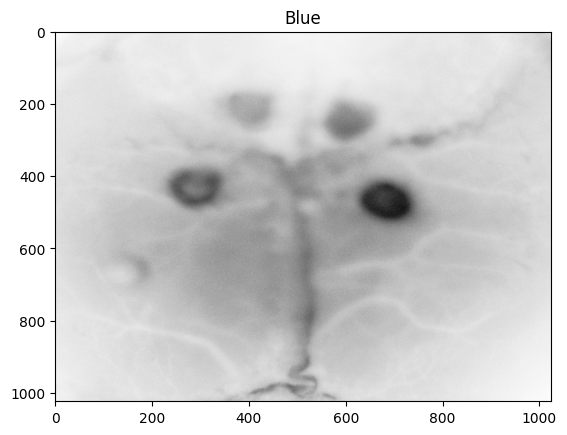

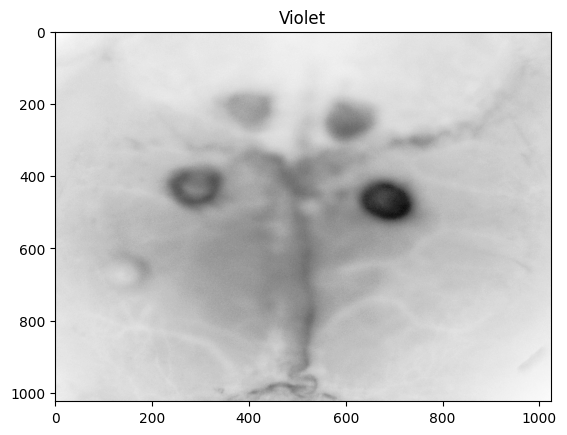

In [79]:
# Visualize the imaging data.

from matplotlib import pyplot as plt

plt.imshow(photon_series_blue.data[2200].T, aspect="auto", cmap="Greys")
plt.title("Blue")
plt.show()

plt.imshow(photon_series_violet.data[2200].T, aspect="auto", cmap="Greys")
plt.title("Violet")
plt.show()


The timestamps for the blue frames can be accessed as `nwbfile.acquisition['OnePhotonSeriesBlue'].timestamps`.

The blue frame timestamps that are aligned with the behavior clock are added from the `wf_behav_sync.mat` file.
The violet frame timestamps are aligned to the blue frame timestamps by interpolation.

In [77]:
photon_series_blue.timestamps[:100]

array([ 0.99890178,  1.09832287,  1.19802403,  1.29878521,  1.3985163 ,
        1.4982475 ,  1.59895861,  1.69868982,  1.79842091,  1.89919209,
        1.99928319,  2.09900427,  2.19871545,  2.29944658,  2.39937782,
        2.49893904,  2.59863997,  2.69940114,  2.79914236,  2.89887357,
        2.99961472,  3.0995059 ,  3.19917703,  3.29977798,  3.39953923,
        3.49995041,  3.6000514 ,  3.69978261,  3.79951382,  3.89927483,
        3.99958611,  4.10017729,  4.1993084 ,  4.30006933,  4.39934063,
        4.50018167,  4.60018301,  4.69991398,  4.80001545,  4.90021658,
        4.9998374 ,  5.10053873,  5.2001996 ,  5.29972076,  5.40045214,
        5.50018311,  5.59991455,  5.70064545,  5.80070686,  5.90044785,
        6.00041914,  6.10015011,  6.20031118,  6.30104256,  6.40080357,
        6.50087452,  6.60110569,  6.70098686,  6.80102825,  6.90059948,
        7.00133038,  7.10057163,  7.20130253,  7.30085373,  7.40109491,
        7.50086594,  7.60156727,  7.70132828,  7.80102968,  7.90

The processed imaging data is stored in the "ophys" processing module, which can be accessed as `nwbfile.processing["ophys"]`.

In [81]:
nwbfile.processing["ophys"]

ophys pynwb.base.ProcessingModule at 0x5363661904
Fields:
  data_interfaces: {
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
    MotionCorrectionSeriesBlue <class 'pynwb.base.TimeSeries'>,
    MotionCorrectionSeriesViolet <class 'pynwb.base.TimeSeries'>,
    OnePhotonSeriesProcessedBlue <class 'pynwb.ophys.OnePhotonSeries'>,
    OnePhotonSeriesProcessedViolet <class 'pynwb.ophys.OnePhotonSeries'>,
    SegmentationImages <class 'pynwb.base.Images'>,
    SegmentationImagesBlue <class 'pynwb.base.Images'>,
    SegmentationImagesProcessedViolet <class 'pynwb.base.Images'>
  }
  description: No description.

## Motion Correction

The x,y shifts for the blue and violet frames is added as [TimeSeries](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.TimeSeries) objects.

The motion correction series for the blue frames can be accessed as `nwbfile.processing["ophys"]["MotionCorrectionSeriesBlue"]`.

The timestamps for the motion correction series references the same timestamps as for the raw imaging data.

In [84]:
motion_correction_blue = nwbfile.processing["ophys"]["MotionCorrectionSeriesBlue"]
motion_correction_blue

MotionCorrectionSeriesBlue pynwb.base.TimeSeries at 0x5364092496
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (37341, 2), type "<u2">
  description: The x, y shifts for the OnePhotonSeriesBlue imaging data.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (37341,), type "<f8">
  timestamps_unit: seconds
  unit: px

In [91]:
motion_correction_blue.data[:10], motion_correction_blue.timestamps[:10]

(array([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]], dtype=uint16),
 array([0.99890178, 1.09832287, 1.19802403, 1.29878521, 1.3985163 ,
        1.4982475 , 1.59895861, 1.69868982, 1.79842091, 1.89919209]))

## Processed Widefield Imaging

The downsampled imaging data for the blue frames can accessed as `nwbfile.processing["ophys"]["OnePhotonSeriesProcessedBlue"]`.

The data in [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

The binned image size is (128, 128) which can be accessed with the "dimension" attribute in `nwbfile.processing["ophys"]["OnePhotonSeriesProcessedBlue"]`.

In [94]:
nwbfile.processing["ophys"]["OnePhotonSeriesProcessedBlue"]

OnePhotonSeriesProcessedBlue pynwb.ophys.OnePhotonSeries at 0x5353908944
Fields:
  binning: 64
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (37341, 128, 128), type "<f8">
  description: Processed imaging data from one-photon excitation microscopy.
  dimension: <HDF5 dataset "dimension": shape (2,), type "<i8">
  imaging_plane: ImagingPlaneBlue pynwb.ophys.ImagingPlane at 0x5353906320
Fields:
  conversion: 1.0
  description: The plane or volume being imaged by the microscope.
  device: Microscope pynwb.device.Device at 0x5353899984
  excitation_lambda: nan
  imaging_rate: 10.0
  indicator: unknown
  location: unknown
  optical_channel: (
    OpticalChannelBlue <class 'pynwb.ophys.OpticalChannel'>
  )
  unit: meters

  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (37341,), type "<f8">
  timestamps_unit: seconds
  unit: n.a.

In [97]:
nwbfile.processing["ophys"]["OnePhotonSeriesProcessedBlue"].dimension[:]

array([128, 128])

## Accessing the segmentation data

The segmentation output for the Widefield Imaging data is stored in `nwbfile.processing["ophys"]`. 

In NWB, the [PlaneSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.PlaneSegmentation) class stores the detected regions of interest in the [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) data. The [ImageSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.ImageSegmentation) can contain multiple `PlaneSegmentation` tables, so that we can store results of different segmentation algorithms or different segmentation classes.

We can access the plane segmentation for the processed [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) data (blue frames) as 
`nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentationProcessedBlue"]`.


In [105]:
plane_segmentation = nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentationProcessedBlue"][:]
plane_segmentation[:10]

,image_mask,ROICentroids,Accepted,Rejected,location
id,,,,,
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[14.705515088449532, 112.51925078043705]",1,0,VISp-L
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[106.82650142993327, 114.68255481410867]",1,0,VISp-R
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[30.074074074074073, 107.95833333333333]",1,0,VISpm-L
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[88.71363636363637, 110.15]",1,0,VISpm-R
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[29.676855895196507, 92.2882096069869]",1,0,VISam-L
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[90.1889400921659, 94.58986175115207]",1,0,VISam-R
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[21.92622950819672, 83.87158469945355]",1,0,VISa-L
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[98.55342465753425, 86.38356164383562]",1,0,VISa-R
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.009615384615385, 90.4326923076923]",1,0,VISrl-L


The summary images of the segmentation are stored in [Images](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.Images) container in NWB. 

The manual mask and contrast based vasculature mask for the blue channel (full size image) can be accessed 
as `nwbfile.processing["ophys"]["SegmentationImagesBlue"]`.


In [174]:
images_blue = nwbfile.processing["ophys"]["SegmentationImagesBlue"]
images_blue

SegmentationImagesBlue pynwb.base.Images at 0x5364044880
Fields:
  description: Contains the manual mask and the contrast based vasculature mask for the blue channel in the full size session image.
  images: {
    manual <class 'pynwb.image.GrayscaleImage'>,
    vasculature <class 'pynwb.image.GrayscaleImage'>
  }

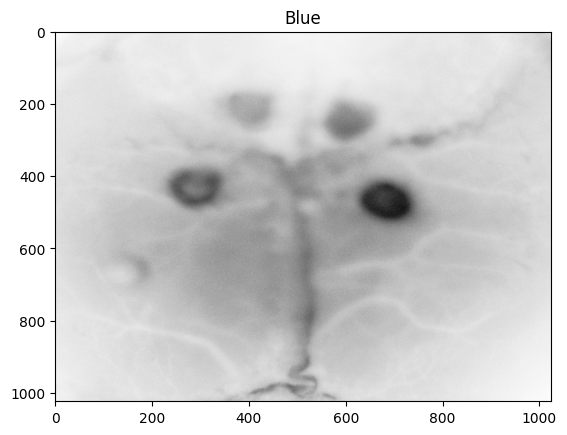

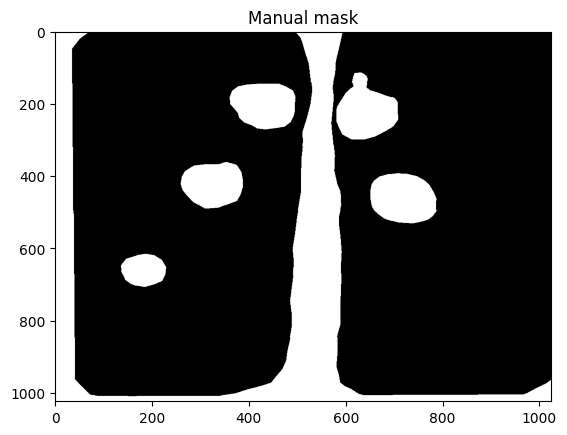

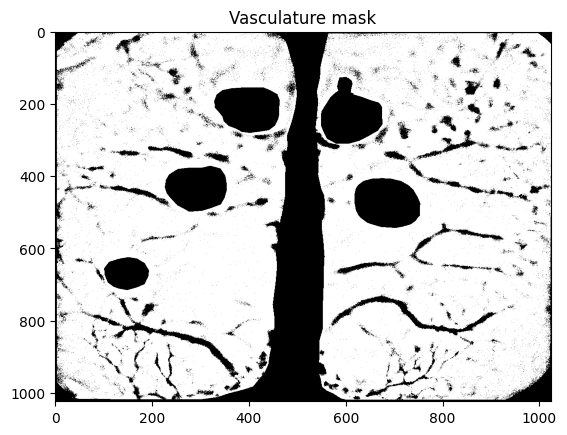

In [175]:
plt.imshow(photon_series_blue.data[2200].T, aspect="auto", cmap="Greys")
plt.title("Blue")
plt.show()

plt.imshow(images_blue.images["manual"].data[:].T, aspect="auto", cmap="Greys")
plt.title("Manual mask")
plt.show()

plt.imshow(images_blue.images["vasculature"].data[:].T, aspect="auto", cmap="Greys")
plt.title("Vasculature mask")
plt.show()

The PCA mask and the vasculature mask for the blue channel on the binned session image can be accessed from 
`nwbfile.processing["ophys"]["SegmentationImages"]`.

In [165]:
nwbfile.processing["ophys"]["SegmentationImages"]

SegmentationImages pynwb.base.Images at 0x5364042192
Fields:
  description: The summary images of the segmentation.
  images: {
    pca_blue <class 'pynwb.image.GrayscaleImage'>,
    vasculature <class 'pynwb.image.GrayscaleImage'>
  }

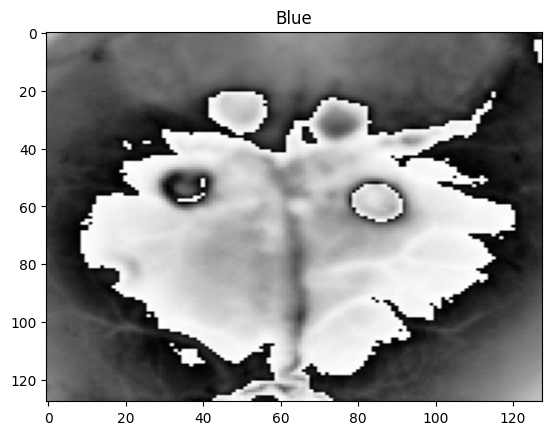

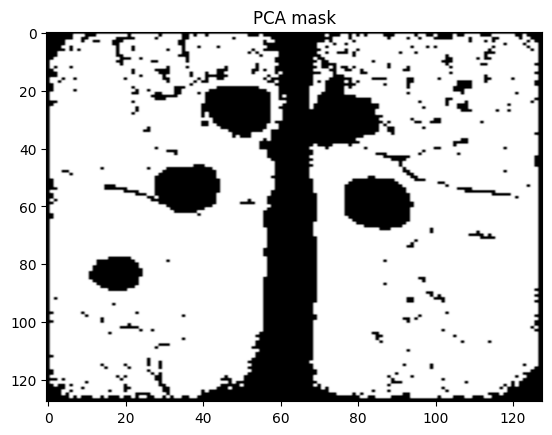

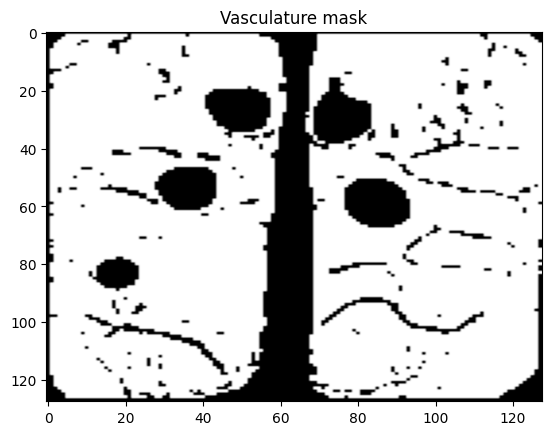

In [170]:
images_blue = nwbfile.processing["ophys"]["SegmentationImages"]

plt.imshow(nwbfile.processing["ophys"]["OnePhotonSeriesProcessedBlue"].data[2200].T, aspect="auto", cmap="Greys")
plt.title("Blue")
plt.show()

plt.imshow(images_blue.images["pca_blue"].data[:].T, aspect="auto", cmap="Greys")
plt.title("PCA mask")
plt.show()

plt.imshow(images_blue.images["vasculature"].data[:].T, aspect="auto", cmap="Greys")
plt.title("Vasculature mask")
plt.show()

The PCA mask for the violet channel on the binned session image can be accessed from 
`nwbfile.processing["ophys"]["SegmentationImagesProcessedViolet"]`

In [178]:
images_violet = nwbfile.processing["ophys"]["SegmentationImagesProcessedViolet"]
images_violet

SegmentationImagesProcessedViolet pynwb.base.Images at 0x5354146128
Fields:
  description: Contains the PCA mask for the violet channel on the binned session image.
  images: {
    pca_violet <class 'pynwb.image.GrayscaleImage'>
  }

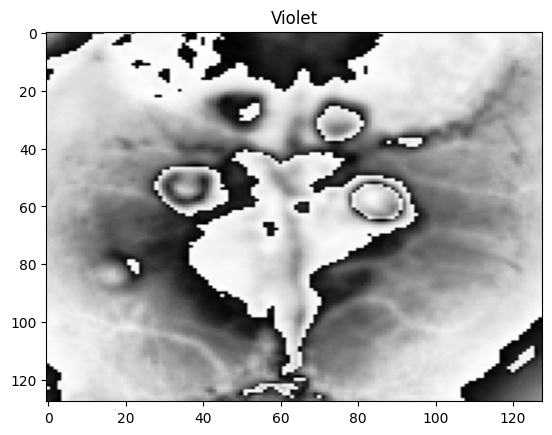

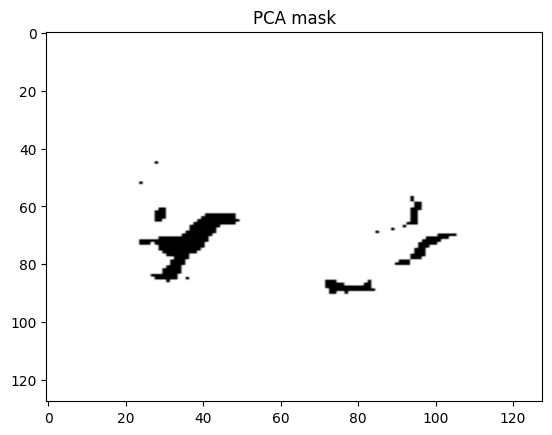

In [179]:
plt.imshow(nwbfile.processing["ophys"]["OnePhotonSeriesProcessedViolet"].data[2200].T, aspect="auto", cmap="Greys")
plt.title("Violet")
plt.show()

plt.imshow(images_violet.images["pca_violet"].data[:].T, aspect="auto", cmap="Greys")
plt.title("PCA mask")
plt.show()

# Access Behavior <a name="access-behavior"></a>

This section demonstrates how to access behavioral data from the [pynwb.behavior](https://pynwb.readthedocs.io/en/stable/pynwb.behavior.html#module-pynwb.behavior) module.

The behavior data is stored in the "behavior" processing module, which can be accessed as `nwbfile.processing["behavior"]`.


In [183]:
nwbfile.processing["behavior"]

behavior pynwb.base.ProcessingModule at 0x5303248656
Fields:
  data_interfaces: {
    Position <class 'pynwb.behavior.Position'>,
    SensorDots <class 'pynwb.base.TimeSeries'>,
    SensorDotsByImFrame <class 'pynwb.base.TimeSeries'>,
    TTLs <class 'abc.AnnotatedEventsTable'>,
    Velocity <class 'pynwb.base.TimeSeries'>,
    VelocityByImFrame <class 'pynwb.base.TimeSeries'>,
    VelocityGain <class 'pynwb.base.TimeSeries'>,
    ViewAngle <class 'pynwb.behavior.CompassDirection'>,
    licks <class 'pynwb.base.TimeSeries'>
  }
  description: contains processed behavioral data

## Access Position

[SpatialSeries](https://pynwb.readthedocs.io/en/stable/pynwb.behavior.html#pynwb.behavior.SpatialSeries) is a subclass of [TimeSeries](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.TimeSeries) that represents data in space, such as the spatial direction, e.g., of gaze or travel, or position of an animal over time.

The x, y (z) position of the animal is stored stored in `SpatialSeries` object inside the [Position](https://pynwb.readthedocs.io/en/stable/pynwb.behavior.html#pynwb.behavior.Position) container.

The Position container can be accessed as `nwbfile.processing["behavior"]["Position"]`.

In [184]:
nwbfile.processing["behavior"]["Position"]

Position pynwb.behavior.Position at 0x5353902800
Fields:
  spatial_series: {
    SpatialSeries <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesByImFrame <class 'pynwb.behavior.SpatialSeries'>
  }

The x, y, z position of the animal by ViRMEN iteration can be accessed as `nwbfile.processing["behavior"]["Position"]["SpatialSeries"]`.

In [192]:
position_by_virmen = nwbfile.processing["behavior"]["Position"]["SpatialSeries"]
position_by_virmen

SpatialSeries pynwb.behavior.SpatialSeries at 0x5364042576
Fields:
  comments: no comments
  conversion: 0.01
  data: <HDF5 dataset "data": shape (407877, 3), type "<f8">
  description: The x, y, z position of the animal by ViRMEN iteration.
  interval: 1
  offset: 0.0
  reference_frame: (0,0) is the start of the 'sample' region (or 'cue' region) which varies by maze and task.
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (407877,), type "<f8">
  timestamps_unit: seconds
  unit: meters

The x, y, position of the animal averaged over the iterations for each frame can be accessed as `nwbfile.processing["behavior"]["Position"]["SpatialSeriesByImFrame"]`.

In [195]:
position_by_frame = nwbfile.processing["behavior"]["Position"]["SpatialSeriesByImFrame"]
position_by_frame

SpatialSeriesByImFrame pynwb.behavior.SpatialSeries at 0x5364040336
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (37341, 2), type "<f4">
  description: The position of the animal averaged over the iterations for each frame.
  interval: 1
  offset: 0.0
  reference_frame: (0,0) is the start of the 'sample' region (or 'cue' region) which varies by maze and task.
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (37341,), type "<f8">
  timestamps_unit: seconds
  unit: meters

The "SpatialSeriesByImFrame" has the same time basis as the imaging data (blue frames):

In [199]:
position_by_frame.timestamps.shape, photon_series_blue.timestamps.shape,

((37341,), (37341,))

# View NWB <a name="view-nwb"></a>

This section demonstrates how to visualise the contents of an NWB file interactively using `NWBWidgets`.

In [202]:
from nwbwidgets import nwb2widget

nwb2widget(nwbfile)

We also use [Neurosift](https://github.com/flatironinstitute/neurosift), a platform for the visualization of neuroscience data in the web browser.